<a href="https://colab.research.google.com/github/basugautam/Reproducibility-Challenge-Project/blob/Architecture-Files/1_Datasets_prep_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd

# Load ECL dataset from the UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
ecl_data = pd.read_csv(url)

# Display the first few rows of the dataset
ecl_data.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [47]:
# Check for missing values in the ECL dataset
ecl_missing = ecl_data.isnull().sum()

# Fill missing values using forward fill method
ecl_data_filled = ecl_data.fillna(method='ffill')

# Display the first few rows after filling missing values
ecl_data_filled.head()


<ipython-input-47-08846215aeb3>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ecl_data_filled = ecl_data.fillna(method='ffill')


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to normalize data
scaler = MinMaxScaler()

# Normalize the 'T1' feature (temperature)
ecl_data_filled['T1_normalized'] = scaler.fit_transform(ecl_data_filled[['T1']])

# Display the first few rows of the normalized data
ecl_data_filled[['T1', 'T1_normalized']].head()


,T1,T1_normalized
0,19.89,0.32735
1,19.89,0.32735
2,19.89,0.32735
3,19.89,0.32735
4,19.89,0.32735


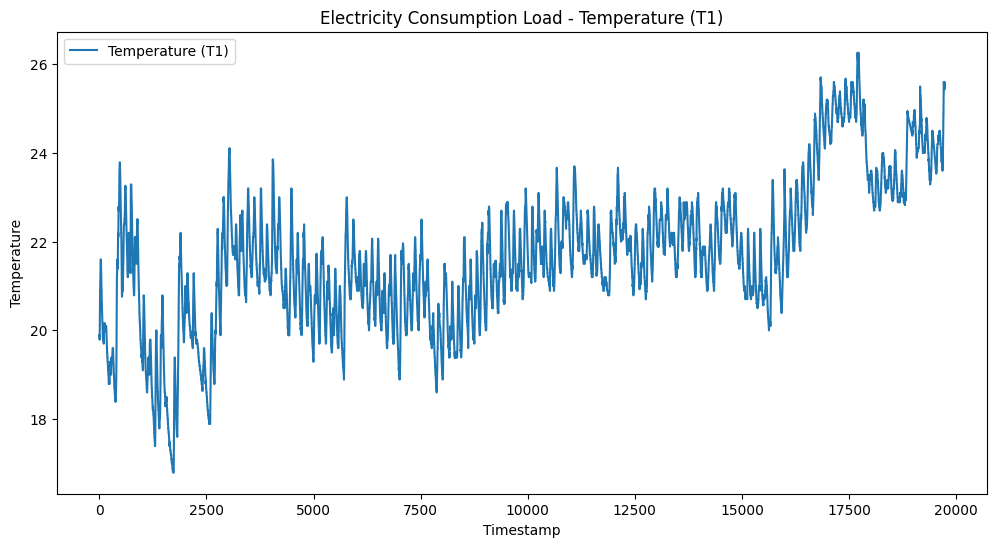

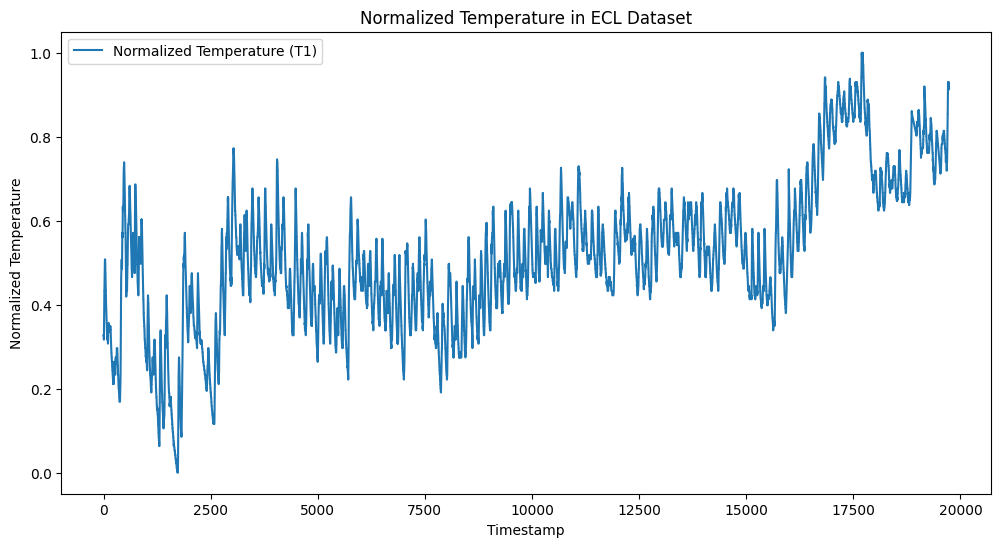

In [49]:
import matplotlib.pyplot as plt

# Plot the temperature data ('T1') to inspect its trend over time
plt.figure(figsize=(12, 6))
plt.plot(ecl_data_filled['T1'], label='Temperature (T1)')
plt.title('Electricity Consumption Load - Temperature (T1)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Plot the normalized temperature data
plt.figure(figsize=(12, 6))
plt.plot(ecl_data_filled['T1_normalized'], label='Normalized Temperature (T1)')
plt.title('Normalized Temperature in ECL Dataset')
plt.xlabel('Timestamp')
plt.ylabel('Normalized Temperature')
plt.legend()
plt.show()


In [50]:
# Display summary statistics of the preprocessed ECL data
ecl_data_filled.describe()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,T1_normalized
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,0.517061
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,0.169595
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,0.419219
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,0.507920
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,0.613516
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,1.000000


<Figure size 1400x3000 with 0 Axes>

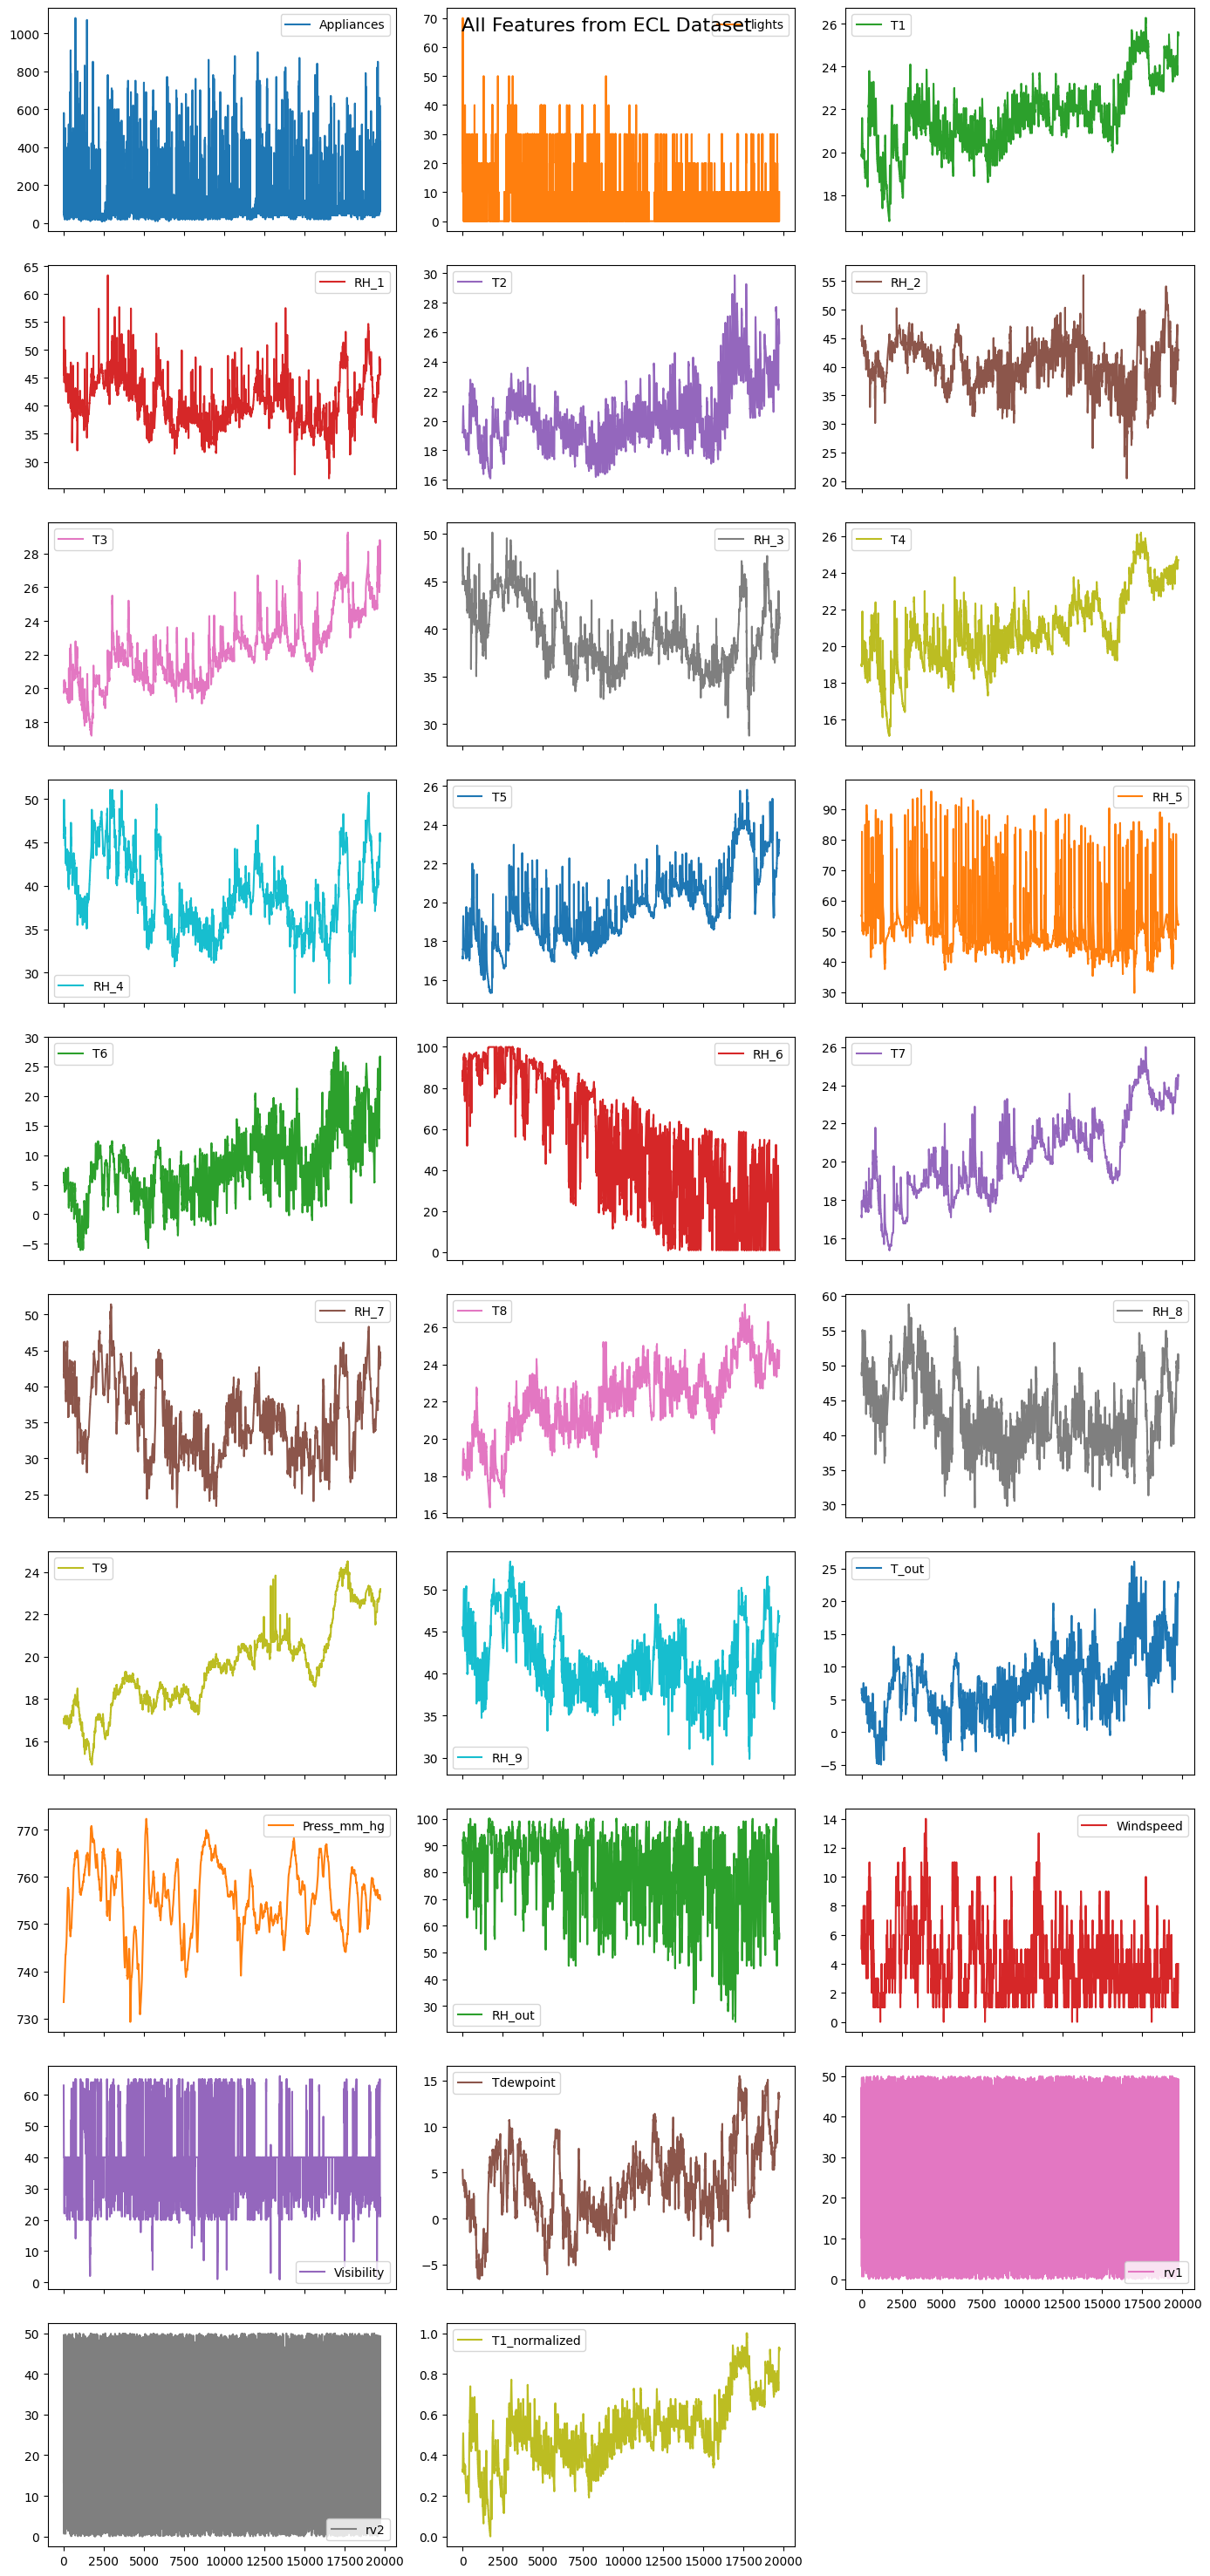

In [51]:
import matplotlib.pyplot as plt

# Number of features excluding the 'date' column
num_features = ecl_data_filled.shape[1] - 1  # Subtracting the 'date' column

# Calculate the number of rows and columns for the subplot layout dynamically
num_columns = 3  # Number of columns (you can adjust this as needed)
num_rows = (num_features // num_columns) + (num_features % num_columns > 0)  # Calculate number of rows

# Plot all features to inspect their behavior over time
plt.figure(figsize=(14, num_rows * 3))  # Adjusting figure size based on the number of rows
ecl_data_filled.drop(['date'], axis=1).plot(subplots=True, layout=(num_rows, num_columns), figsize=(14, num_rows * 3))
plt.suptitle('All Features from ECL Dataset', fontsize=16)
plt.tight_layout()
plt.show()
